# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url =f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()
        
#     # Run an API request for each of the cities
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
           
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        # Append null values
        print("City not found. Skipping...")
        pass
    
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | schofield barracks
Processing Record 4 of Set 1 | priozersk
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | plouzane
Processing Record 8 of Set 1 | tamanrasset
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | vyazemskiy
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | tremp
Processing Record 16 of Set 1 | grande prairie
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | teodoro sampaio
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | laghouat
Processing Record 21 of Set 1 | east ballina
Processing Record 22 of Set 1 | douentza
Proc

Processing Record 40 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 41 of Set 4 | wailua homesteads
Processing Record 42 of Set 4 | sydney mines
Processing Record 43 of Set 4 | namsos
Processing Record 44 of Set 4 | wajir
Processing Record 45 of Set 4 | gongzhuling
Processing Record 46 of Set 4 | hayma'
City not found. Skipping...
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 49 of Set 4 | weno
Processing Record 50 of Set 4 | lido adriano
Processing Record 1 of Set 5 | toga village
City not found. Skipping...
Processing Record 2 of Set 5 | cao bang
Processing Record 3 of Set 5 | utrik
Processing Record 4 of Set 5 | benguela
Processing Record 5 of Set 5 | nieuw-lekkerland
Processing Record 6 of Set 5 | jumla
Processing Record 7 of Set 5 | molodohvardiys'k
Processing Record 8 of Set 5 | berezovyy
Processing Record 9 of Set 5 | hirara
Processing Record 10 of Set 5 | syktyvkar
Processing Record

Processing Record 31 of Set 8 | usinsk
Processing Record 32 of Set 8 | emirdag
Processing Record 33 of Set 8 | marsh harbour
Processing Record 34 of Set 8 | lihue
Processing Record 35 of Set 8 | newman
Processing Record 36 of Set 8 | saratamata
City not found. Skipping...
Processing Record 37 of Set 8 | the pas
Processing Record 38 of Set 8 | poso
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | ramnagar
Processing Record 41 of Set 8 | 'ain deheb
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | phongsali
Processing Record 44 of Set 8 | primero de enero
Processing Record 45 of Set 8 | oppdal
Processing Record 46 of Set 8 | barabai
Processing Record 47 of Set 8 | ahau
City not found. Skipping...
Processing Record 48 of Set 8 | mangalia
Processing Record 49 of Set 8 | scarborough
Processing Record 50 of Set 8 | san fernando de apure
Processing Record 1 of Set 9 | namibe
Processing Record 2 of Set 9 | oranjemund
Processing Record 3 of Set 9 |

Processing Record 21 of Set 12 | chimoio
Processing Record 22 of Set 12 | happy valley-goose bay
Processing Record 23 of Set 12 | oyem
Processing Record 24 of Set 12 | sultangazi
Processing Record 25 of Set 12 | ampasimanolotra
City not found. Skipping...
Processing Record 26 of Set 12 | arteche
Processing Record 27 of Set 12 | puerto ayacucho
Processing Record 28 of Set 12 | parnarama
Processing Record 29 of Set 12 | tokat
Processing Record 30 of Set 12 | rumoi
Processing Record 31 of Set 12 | ma'rib
Processing Record 32 of Set 12 | hammerfest
Processing Record 33 of Set 12 | caluula
Processing Record 34 of Set 12 | hassi messaoud
Processing Record 35 of Set 12 | olinda
Processing Record 36 of Set 12 | botou
Processing Record 37 of Set 12 | pionerskiy
Processing Record 38 of Set 12 | antofagasta
Processing Record 39 of Set 12 | boende
Processing Record 40 of Set 12 | kerikeri
Processing Record 41 of Set 12 | ayvacik
Processing Record 42 of Set 12 | cartagena del chaira
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,286.38,86,27,4.47,NZ,1691117715
1,klyuchi,52.2667,79.1667,298.53,47,7,0.51,RU,1691117715
2,schofield barracks,21.4936,-158.0615,301.33,62,75,3.09,US,1691117716
3,priozersk,61.0393,30.1291,292.09,93,95,3.78,RU,1691117716
4,papatowai,-46.5619,169.4708,281.55,94,100,7.22,NZ,1691117716


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,286.38,86,27,4.47,NZ,1691117715
1,klyuchi,52.2667,79.1667,298.53,47,7,0.51,RU,1691117715
2,schofield barracks,21.4936,-158.0615,301.33,62,75,3.09,US,1691117716
3,priozersk,61.0393,30.1291,292.09,93,95,3.78,RU,1691117716
4,papatowai,-46.5619,169.4708,281.55,94,100,7.22,NZ,1691117716


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

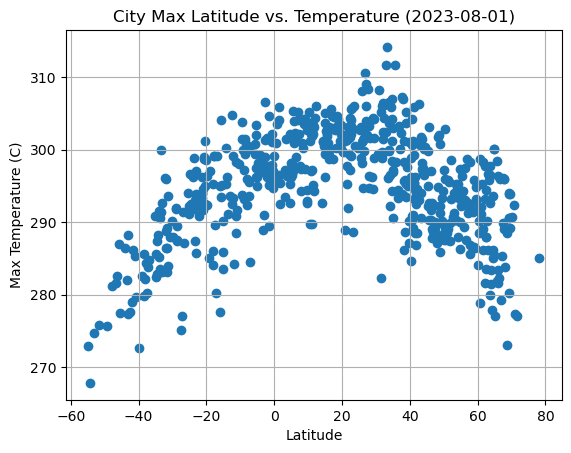

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-08-01)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

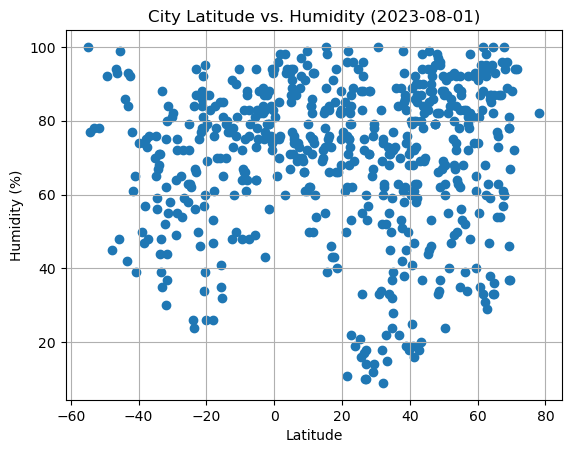

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-01)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

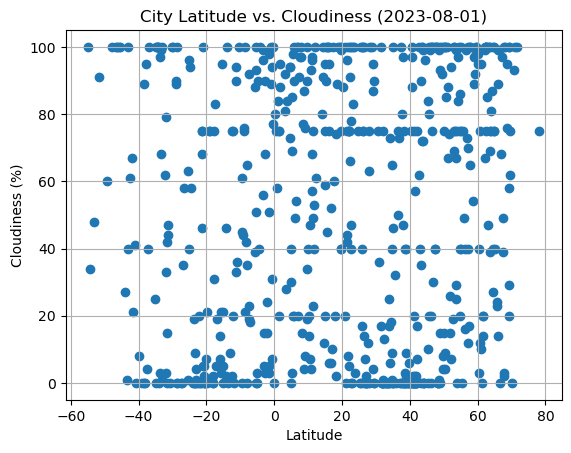

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-01)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

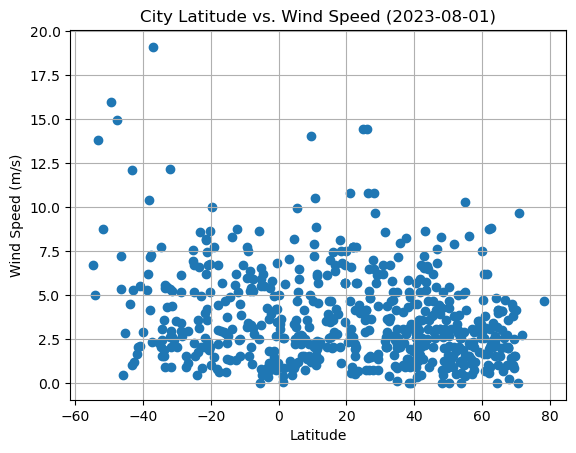

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-01)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, title, x_label, y_label,line_eq_pos=(10,277)):
    # Calculate the correlation
    correlation = round(st.pearsonr(x_values,y_values)[0],2)

    # Calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Gernerate scatter chart with liner regression line, equation of line, r-squared value
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, 'r-')

    # Plot the Annotation in the graph 
    plt.annotate(line_eq,line_eq_pos,fontsize=11,color="red")

    # Define title and x/y labels
    plt.title(title, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f'The r-value is: {rvalue}')
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,klyuchi,52.2667,79.1667,298.53,47,7,0.51,RU,1691117715
2,schofield barracks,21.4936,-158.0615,301.33,62,75,3.09,US,1691117716
3,priozersk,61.0393,30.1291,292.09,93,95,3.78,RU,1691117716
6,plouzane,48.3833,-4.6167,288.18,97,0,5.14,FR,1691117717
7,tamanrasset,22.7850,5.5228,299.10,22,0,2.06,DZ,1691117717


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,286.38,86,27,4.47,NZ,1691117715
4,papatowai,-46.5619,169.4708,281.55,94,100,7.22,NZ,1691117716
5,geraldton,-28.7667,114.6000,287.38,72,0,5.14,AU,1691117716
8,uturoa,-16.7333,-151.4333,299.09,70,19,5.70,PF,1691117717
9,kununurra,-15.7667,128.7333,304.14,35,3,4.63,AU,1691117718


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5968841453595899


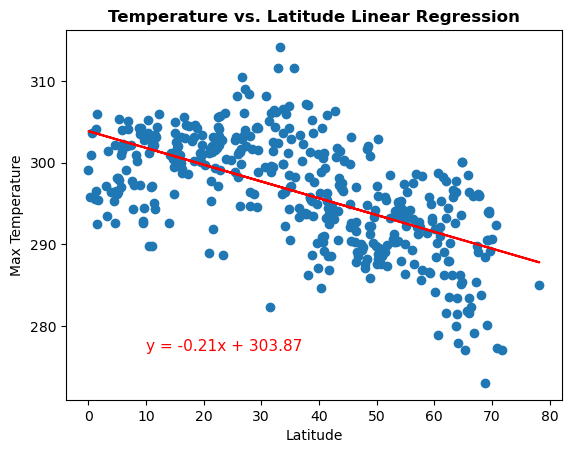

In [15]:
# Linear regression on Northern Hemisphere
title='Temperature vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Max Temperature'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], title, x_label, y_label)

The r-value is: 0.7425668343577141


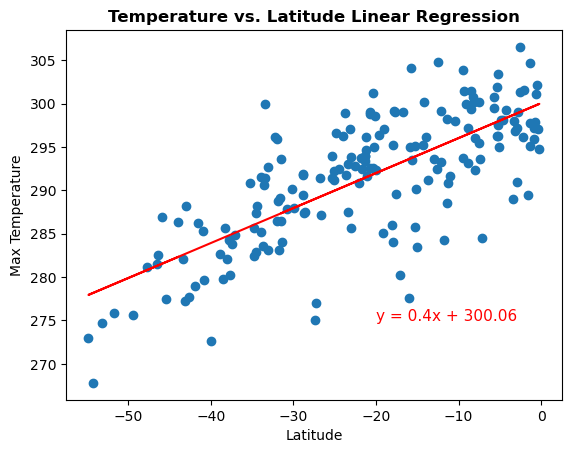

In [16]:
# Linear regression on Southern Hemisphere
title='Temperature vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Max Temperature'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], title, x_label, y_label,(-20,275))

**Discussion about the linear relationship:** 
There is a moderatre negative correlation between temperature and latitude in the nothern hemisphere while
there is a very strong positive correlation between temperature and latitude in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.023691950801805733


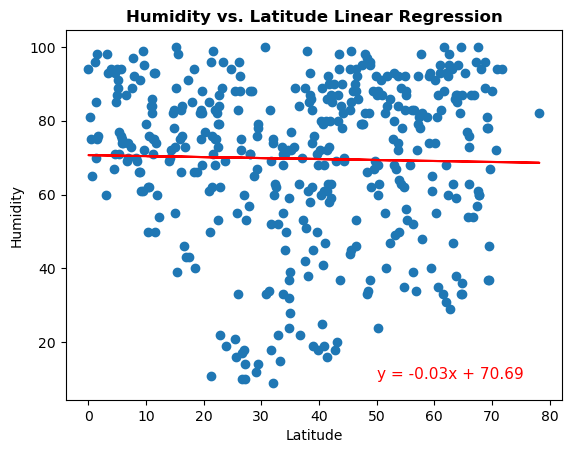

In [17]:
# Northern Hemisphere
title='Humidity vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Humidity'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], title, x_label, y_label,(50,10))

The r-value is: 0.14215586396321414


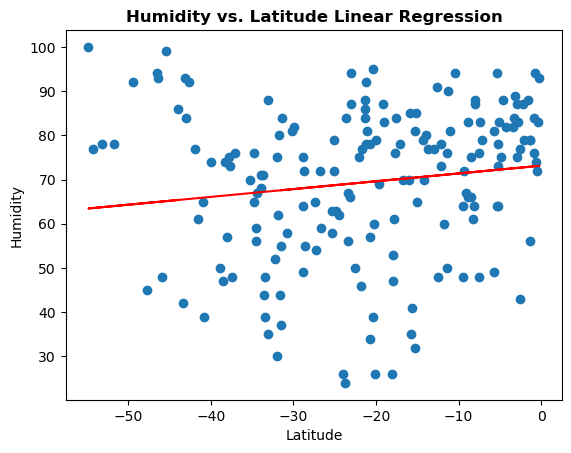

In [18]:
# Southern Hemisphere
title='Humidity vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Humidity'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], title, x_label, y_label,(-20,10))

**Discussion about the linear relationship:** 
There is no or very weak negative correlation between humidity and latitude in the nothern hemisphere while
there is a very weak positive correlation between temperature and latitude in southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03404371684438348


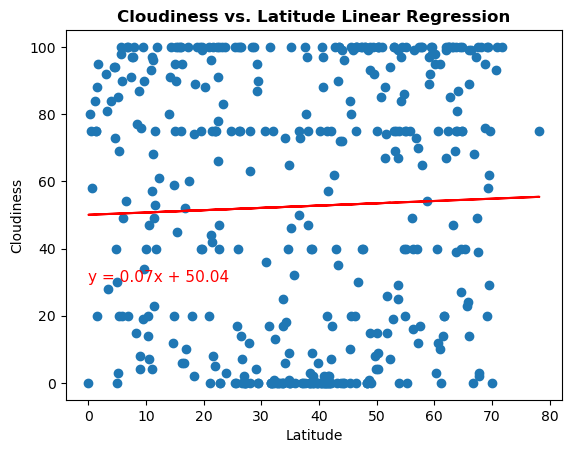

In [19]:
# Northern Hemisphere
title='Cloudiness vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Cloudiness'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], title, x_label, y_label,(0,30))

The r-value is: -0.07024216652972651


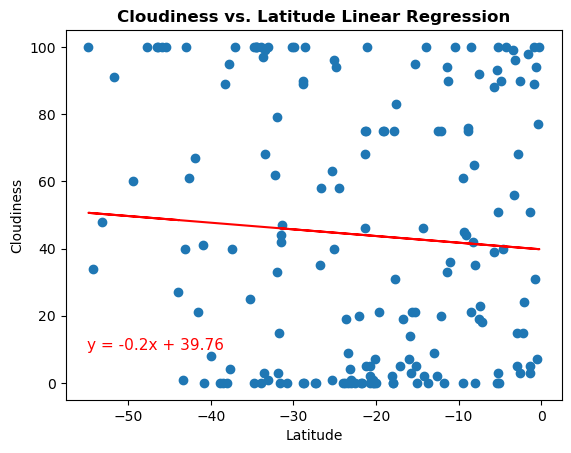

In [20]:
# Southern Hemisphere
title='Cloudiness vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Cloudiness'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], title, x_label, y_label,(-55,10))

**Discussion about the linear relationship:** There is None or very weak negative correlation between Cloudiness and latitude in both hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16533359195571543


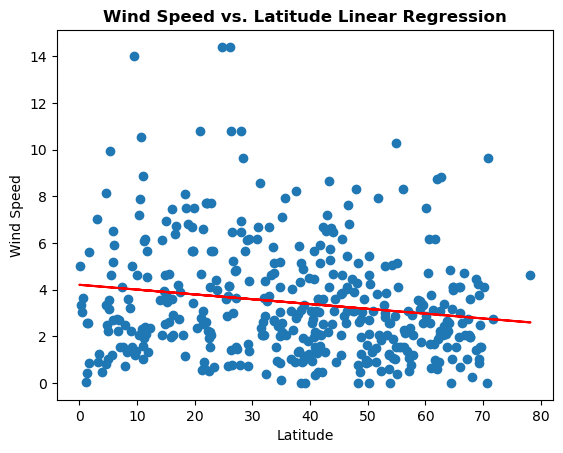

In [21]:
# Northern Hemisphere
title='Wind Speed vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Wind Speed'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], title, x_label, y_label,(40,22))

The r-value is: -0.25185317822180164


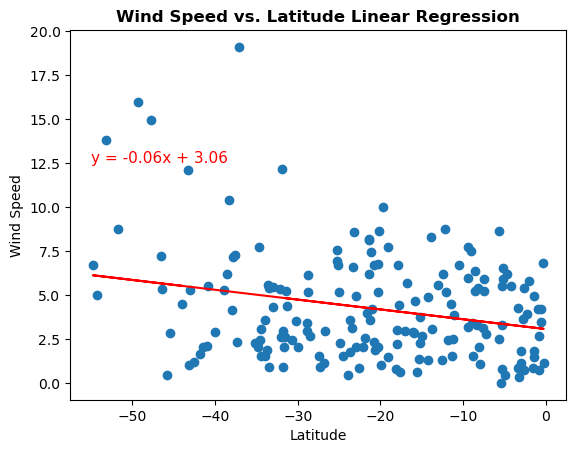

In [22]:
# Southern Hemisphere
title='Wind Speed vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Wind Speed'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], title, x_label, y_label,(-55,12.5))

**Discussion about the linear relationship:** 
There is no or very weak negative correlation between wind speed and latitude in the nothern and southern hemisphere .